In [5]:
import pandas as pd
import numpy  as np

In [7]:
concernPolls = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/covid-19-polls/master/covid_concern_polls.csv")

def avgConcern(d):
    return pd.Series({"very":np.mean(d["very"])})
avgConcernPolls = concernPolls.groupby(["end_date"]).apply( avgConcern )

avgConcernPolls = avgConcernPolls.reset_index()
avgConcernPolls["end_date"] = pd.to_datetime(avgConcernPolls.end_date)

In [8]:
print(avgConcernPolls)

      end_date       very
0   2020-01-29  19.000000
1   2020-02-02  26.000000
2   2020-02-04  13.000000
3   2020-02-09  17.000000
4   2020-02-11  11.000000
5   2020-02-16  22.000000
6   2020-02-18  18.000000
7   2020-02-25  10.000000
8   2020-02-26  32.000000
9   2020-02-27  41.000000
10  2020-02-28  16.000000
11  2020-03-01  38.000000
12  2020-03-03  24.666667
13  2020-03-05  36.000000
14  2020-03-08  28.750000
15  2020-03-09  32.500000
16  2020-03-10  25.000000
17  2020-03-11  24.000000
18  2020-03-12  22.333333
19  2020-03-13  28.600000
20  2020-03-14  45.000000
21  2020-03-15  42.800000
22  2020-03-16  36.800000
23  2020-03-17  38.000000
24  2020-03-18  49.000000
25  2020-03-19  26.933333
26  2020-03-20  71.000000
27  2020-03-21  59.000000
28  2020-03-22  53.250000
29  2020-03-23  33.333333
..         ...        ...
138 2020-08-04  25.000000
139 2020-08-09  44.000000
140 2020-08-10  49.500000
141 2020-08-11  31.430000
142 2020-08-15  31.000000
143 2020-08-16  39.500000
144 2020-08-

Text(0, 0.5, 'Proportion of people who are VERY concerned')

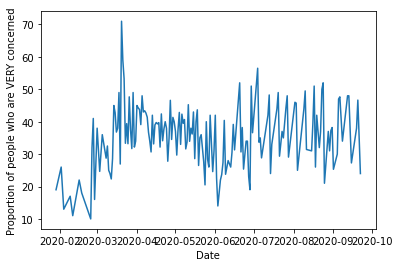

In [10]:
import matplotlib.pyplot as plt # module to start plotting (data vis)
fig,ax  = plt.subplots()        # plotting object 

ax.plot( avgConcernPolls.end_date, avgConcernPolls.very  )

ax.set_xlabel("Date")
ax.set_ylabel("Proportion of people who are VERY concerned")


In [12]:

moreThan50 = [] # this creates an empty list
for pctVery in avgConcernPolls.very: 
    if pctVery > 50:
        moreThan50.append(1)
    else:
        moreThan50.append(0)

print(moreThan50)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


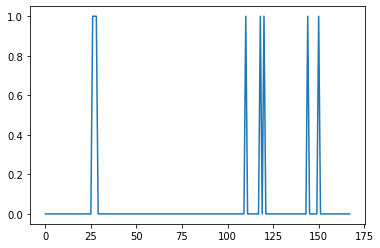

In [13]:
fig,ax = plt.subplots()

ax.plot( moreThan50  )


In [18]:
# Count up the number of 1s and divide by the number of observations
# this is a proportion

numberOf1s = sum(moreThan50)
numberOfobservations = len(moreThan50)

print(numberOf1s)
print(numberOfobservations)


8
168


In [19]:
prop = numberOf1s/numberOfobservations

In [20]:
print(prop)

0.047619047619047616


In [ ]:
# X distributed Bern(0.047)

In [23]:
import numpy as np

np.random.binomial(1,prop)


0

In [32]:
# Simulate an alternative world

crazyBananas = []
for simulationNumber in range(168):
    crazyBananas.append( np.random.binomial(1,prop) )

prop = sum(crazyBananas) / len(crazyBananas)
print(prop)

0.005952380952380952


In [40]:
def alternativeWorld( propFromData  ):
    crazyBananas = []
    for simulationNumber in range(168):
        crazyBananas.append( np.random.binomial(1,propFromData) )
    prop = sum(crazyBananas) / len(crazyBananas)
    return prop

0.5476190476190477

In [41]:
smokeyAndTheBandit = []

for sim in range(5*10**3):
    smokeyAndTheBandit.append( alternativeWorld(0.047) )

print( smokeyAndTheBandit )

[0.05952380952380952, 0.06547619047619048, 0.02976190476190476, 0.07142857142857142, 0.02976190476190476, 0.047619047619047616, 0.05357142857142857, 0.041666666666666664, 0.02976190476190476, 0.02976190476190476, 0.047619047619047616, 0.041666666666666664, 0.06547619047619048, 0.03571428571428571, 0.05357142857142857, 0.05952380952380952, 0.041666666666666664, 0.011904761904761904, 0.03571428571428571, 0.06547619047619048, 0.05357142857142857, 0.047619047619047616, 0.023809523809523808, 0.05357142857142857, 0.047619047619047616, 0.017857142857142856, 0.05952380952380952, 0.02976190476190476, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.023809523809523808, 0.07142857142857142, 0.047619047619047616, 0.06547619047619048, 0.07738095238095238, 0.05952380952380952, 0.05952380952380952, 0.041666666666666664, 0.03571428571428571, 0.05357142857142857, 0.023809523809523808, 0.041666666666666664, 0.047619047619047616, 0.023809523809523808, 0.023809523809523808, 0.0476190476

(array([  14.,  201.,  734., 1323., 1412.,  827.,  371.,   93.,   22.,
           3.]),
 array([0.        , 0.01130952, 0.02261905, 0.03392857, 0.0452381 ,
        0.05654762, 0.06785714, 0.07916667, 0.09047619, 0.10178571,
        0.11309524]),
 <a list of 10 Patch objects>)

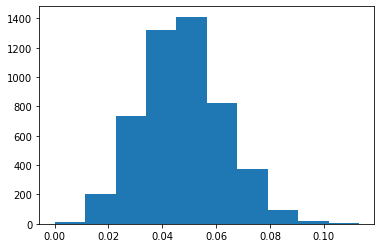

In [43]:
fig,ax = plt.subplots()
ax.hist(smokeyAndTheBandit,10)